In [ ]:
from random import random, randint
from math import sqrt, log

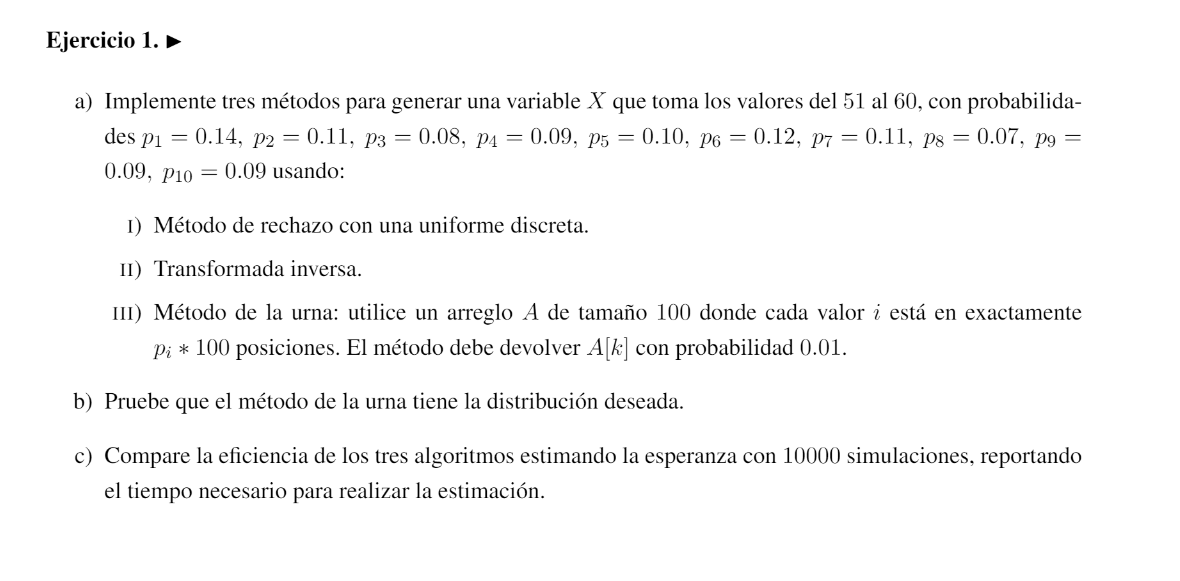

In [ ]:
p = [0.14, 0.11, 0.08, 0.09, 0.10, 0.12, 0.11, 0.07, 0.09, 0.09]
      #       #     #     #     #     #    #           #     #
def esperanza_exacta(p=p):
  E = 0
  for i in range(1, len(p)+1):
    E += i * p[i-1]
  return E

def aceptacion_rechazo(p=p):
  c = 0.14 / (1/10)
  while True:
    u = random()
    y = randint(1,10)
    if u < p[y-1] / (c * (1/10)):
      return y

def transformada_inversa():
  u = random()
  if u < 0.14: return 1
  elif u < 0.26: return 6
  elif u < 0.37: return 2
  elif u < 0.48: return 7
  elif u < 0.58: return 5
  elif u < 0.67: return 4
  elif u < 0.76: return 9
  elif u < 0.85: return 10
  elif u < 0.93: return 3
  else:          return 8

def urna(p=p, M=100):
  A = []
  for i in range(len(p)):
    for j in range(int(M * p[i])):
      A.append(i+1)

  return A[int(random() * M)]


5.221786
5.219999999999999


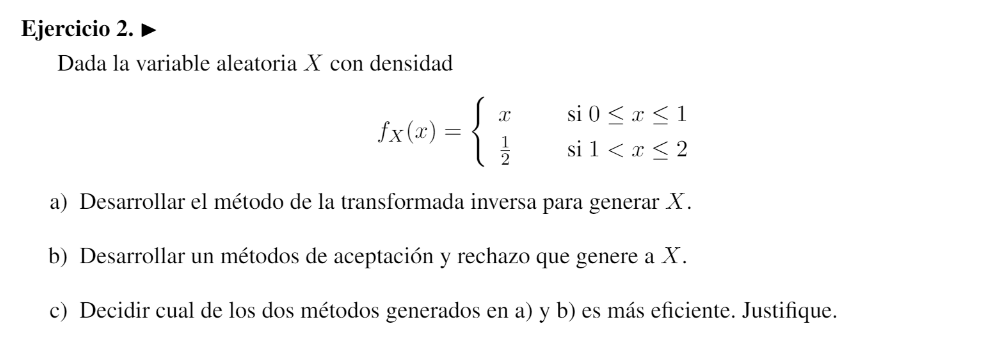

In [35]:
from random import random, randint
from math import log, sqrt

def f(x):
  if 0 <= x and x <= 1:
    return x
  elif 1 < x and x <= 2:
    return 1/2

def transformada_inversa_ej2():
  u = random()
  if u <= 1/2:
    return sqrt(2*u)
  else:
    return 2*u

def aceptacion_rechazo_ej2():
  while True:
    u = random()
    y = random() * 2
    if u < f(y):
      return y

nsim = 1_000_000
E1 = 0
E2 = 0
for _ in range(nsim):
  E1 += aceptacion_rechazo_ej2()
  E2 += transformada_inversa_ej2()
print(E1/nsim)
print(E2/nsim)

1.0833097603413309
1.0834400177237613


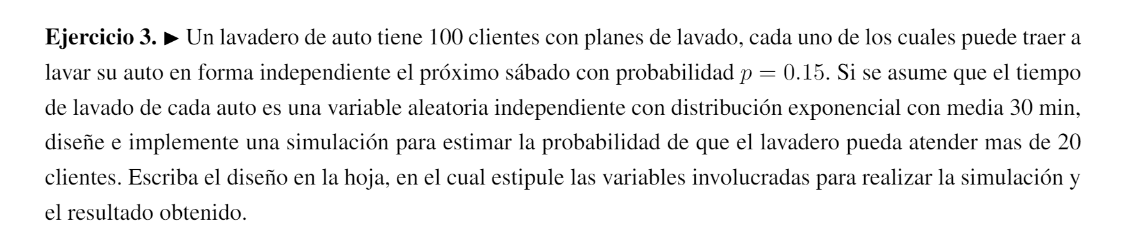

In [ ]:
def exponencial(lamda):
  U = 1-random()
  return -log(U)/lamda


def simulacion(p=0.05, clientes=100):
  tiempo_lavando = 0
  clientes_atendidos = 0
  for _ in range(clientes):
    u = random()
    if u < 0.15:
      tiempo_lavando += exponencial(1/30)
      clientes_atendidos += 1
  return tiempo_lavando, clientes_atendidos

# Asumo que trabajan 8 horas del sabado
def probabilidad(nsim, a=20):

  mas_de_20 = 0
  for _ in range(nsim):
    if simulacion()[1] >= 20:
      mas_de_20 += 1

  return mas_de_20 / nsim

print(probabilidad(1_000))


0.108


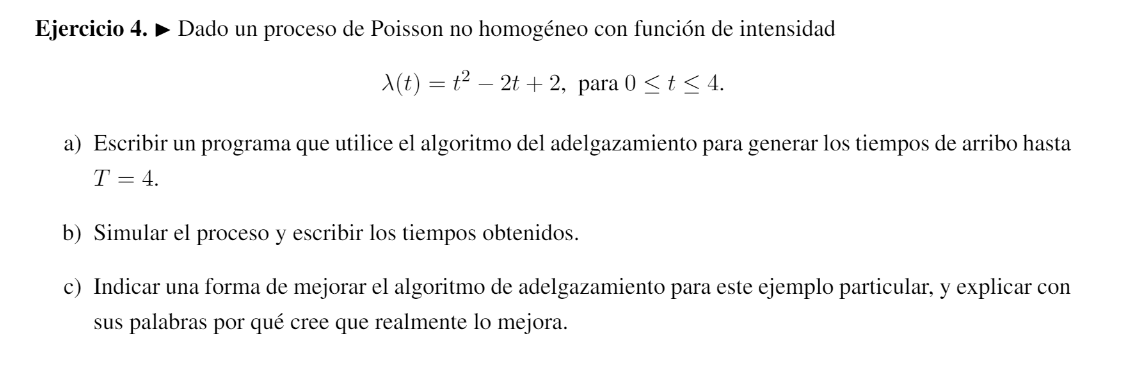

In [ ]:
def lamda_t(t):
  return t**2 - 2*t + 2

def Poisson_no_homogeneo_adelgazamiento(T, lamda, lamda_t):
  """
  Devuelve el n´umero de eventos NT y los tiempos en Eventos
  lamda_t(t): intensidad, lamda_t(t)<=lamda
  """
  NT = 0
  Eventos = []
  U = 1 - random()
  t = -log(U) / lamda
  while t <= T:
    V = random()
    if V < lamda_t(t) / lamda:
      NT += 1
      Eventos.append(t)
    t += -log(1 - random()) / lamda
  return NT, Eventos

print(Poisson_no_homogeneo_adelgazamiento(4, lamda_t(4), lamda_t))

(19, [0.7833810606357051, 2.2245853674846696, 2.4017421969477755, 2.882053001011651, 2.9527659330029348, 3.0928034823363264, 3.202457986366789, 3.2495020043130554, 3.292127498294702, 3.3773090196833615, 3.468219746364435, 3.5554937119669145, 3.7000059806546406, 3.7215286034457002, 3.7733008606545733, 3.7906413568295756, 3.8380488002503625, 3.8707127233456946, 3.970255200970663])
